### Baselines

This Notebook shows you to recreate the baseline results from the paper. It is currently set up to produce results for models "nflow", "ctgan", "tvae", "bayesian_network", and "copulagan" for the breast cancer dataset.

**Imports**

In [1]:
# Third party
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
import seaborn as sns

# Synthcity
from synthcity.plugins.core.dataloader import GenericDataLoader
from synthcity.plugins import Plugins

/home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[KeOps] Warning : Cuda libraries were not detected on the system ; using cpu only mode


**Load data**

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

dataset = "breast"
X = pd.read_csv("../data/wdbc.data", header=None)

ind = list(range(len(X.columns)))
ind = [x for x in ind if x != X.columns.get_loc(1)]

col_list = X.columns[ind]

ct = ColumnTransformer(
    [("scaler", StandardScaler(), col_list)], remainder="passthrough"
)

X_ = ct.fit_transform(X)
X = pd.DataFrame(X_, index=X.index, columns=X.columns)

X

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-0.236405,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015,M
1,-0.236403,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.24389,0.28119,M
2,0.431741,1.579888,0.456187,1.566503,1.558884,0.94221,1.052926,1.363478,2.037231,0.939685,...,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955,1.152255,0.201391,M
3,0.432121,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.93501,M
4,0.432201,1.750297,-1.151816,1.776573,1.826229,0.280372,0.53934,1.371011,1.428493,-0.00956,...,-1.46677,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.3971,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,-0.235732,2.110995,0.721473,2.060786,2.343856,1.041842,0.21906,1.947285,2.320965,-0.312589,...,0.1177,1.752563,2.015301,0.378365,-0.273318,0.664512,1.629151,-1.360158,-0.709091,M
565,-0.23573,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,...,2.047399,1.42194,1.494959,-0.69123,-0.39482,0.236573,0.733827,-0.531855,-0.973978,M
566,-0.235727,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.03868,0.046588,0.105777,-0.809117,...,1.374854,0.579001,0.427906,-0.809587,0.350735,0.326767,0.414069,-1.104549,-0.318409,M
567,-0.235725,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,...,2.237926,2.303601,1.653171,1.430427,3.904848,3.197605,2.289985,1.919083,2.219635,M


In [56]:
X[31] = X[31].replace({'M': 1, 'B': 0})

In [57]:
X = X.astype(float).drop(0,axis=1)

**Fit model**

Re-run the notebook with different baseline models to generate all the baseline data from the paper.

In [72]:
X_train, X_test = train_test_split(X, random_state=0, test_size=0.2, shuffle=True)
gens = Plugins()

baseline_models = ["bayesian_network", "ctgan", "tvae", "nflow"]

gen = gens.get(baseline_models[3])

[2023-08-29T06:21:52.975067+0200][24152][CRITICAL] module disabled: /home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_arf.py
[2023-08-29T06:21:52.976555+0200][24152][CRITICAL] module disabled: /home/dariusbarsony/anaconda3/envs/goggle_env/lib/python3.8/site-packages/synthcity/plugins/generic/plugin_great.py


In [73]:
gen.fit(X_test)

 90%|████████▉ | 899/1000 [00:57<00:06, 15.55it/s]


**Evaluate synthetic data**

In [74]:
X_synth = gen.generate(count=X_test.shape[0]).dataframe()
X_synth.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,0.095298,-0.339132,-0.216015,-0.420896,0.937122,-0.609272,0.617022,-0.396430,0.505425,-0.748057,...,-0.710083,0.619079,-0.322808,0.388490,-0.701488,0.552358,-1.062649,0.862995,-0.345713,1.0
1,1.014480,-0.124186,0.970965,0.333955,0.512886,0.072013,-0.974245,0.051365,-0.403323,0.797798,...,-0.037539,-0.782447,0.316978,0.017977,-0.751729,0.863555,1.406263,0.230452,0.055652,1.0
2,0.125862,0.407982,-1.811917,-0.656378,-0.280034,-0.447234,-0.861756,-0.940328,0.333650,-0.948535,...,0.398620,-1.022339,-1.022744,0.599280,-0.248529,0.498321,-1.470644,-0.343297,-0.976254,1.0
3,1.314133,0.624716,-1.210424,-0.250414,-0.748300,-0.608834,0.018853,-1.016055,0.189135,-0.570113,...,-1.379444,-0.103243,-0.542035,-0.920099,-0.320660,-1.305831,0.606499,-1.436991,-0.020695,0.0
4,-0.009566,-0.663235,0.261341,-0.398911,1.142063,-1.189137,-0.596463,-0.390197,-0.498890,-0.588322,...,0.441252,0.133596,-0.122914,1.106364,-0.479890,-0.885275,0.105037,0.079708,0.536283,0.0


In [75]:
from synthcity.metrics import eval_statistical
from synthcity.metrics import eval_detection
from synthcity.metrics import eval_performance


def evaluate_synthetic(X_synth, X_test):
    quality_evaluator = eval_statistical.AlphaPrecision()
    qual_res = quality_evaluator.evaluate(X_test, X_synth)
    qual_res = {k: v for (k, v) in qual_res.items() if "naive" in k}
    qual_score = np.mean(list(qual_res.values()))

    xgb_evaluator = eval_performance.PerformanceEvaluatorXGB()
    linear_evaluator = eval_performance.PerformanceEvaluatorLinear()
    mlp_evaluator = eval_performance.PerformanceEvaluatorMLP()
    xgb_score = xgb_evaluator.evaluate(X_test, X_synth)
    linear_score = linear_evaluator.evaluate(X_test, X_synth)
    mlp_score = mlp_evaluator.evaluate(X_test, X_synth)
    gt_perf = (xgb_score["gt"] + linear_score["gt"] + mlp_score["gt"]) / 3
    synth_perf = (
        xgb_score["syn_ood"] + linear_score["syn_ood"] + mlp_score["syn_ood"]
    ) / 3

    xgb_detector = eval_detection.SyntheticDetectionXGB()
    mlp_detector = eval_detection.SyntheticDetectionMLP()
    gmm_detector = eval_detection.SyntheticDetectionGMM()
    xgb_det = xgb_detector.evaluate(X_test, X_synth)
    mlp_det = mlp_detector.evaluate(X_test, X_synth)
    gmm_det = gmm_detector.evaluate(X_test, X_synth)
    det_score = (xgb_det["mean"] + mlp_det["mean"] + gmm_det["mean"]) / 3

    return qual_score, (gt_perf, synth_perf), det_score


X_synth_loader = GenericDataLoader(
    X_synth
)
X_test_loader = GenericDataLoader(
    X_test
)

res = evaluate_synthetic(X_synth_loader, X_test_loader)
print(f"Quality: {res[0]:.3f}")
print(f"Detection: {res[2]:.3f}")
print(
    f"Performance on real: {res[1][0]:.3f}, on synth: {res[1][1]:.3f}, diff: {res[1][0] - res[1][1]:.3f}"
)

Quality: 0.564
Detection: 0.705
Performance on real: 0.980, on synth: 0.984, diff: -0.004


**Generate TSNE plots**

In [76]:
X_test["label"] = "Original"
X_synth["label"] = "Synthetic"

concat_df = pd.concat([X_test, X_synth], axis=0)
y_data = concat_df["label"]
x_data = concat_df.drop(["label", '31'], axis=1)

In [77]:
from sklearn.manifold import TSNE
import seaborn as sns

tsne = TSNE(n_components=2, verbose=0, random_state=0)
z = tsne.fit_transform(x_data)
df = pd.DataFrame()
df["y"] = y_data
df["comp-1"] = z[:, 0]
df["comp-2"] = z[:, 1]

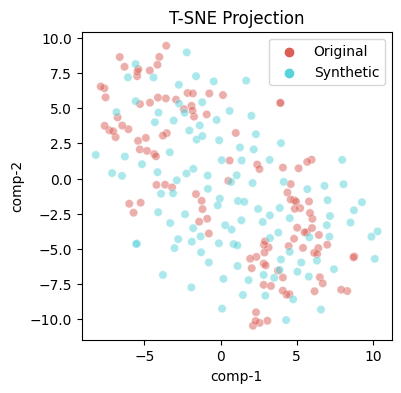

In [78]:
plt.figure(figsize=(4, 4))
sns.scatterplot(
    x="comp-1",
    y="comp-2",
    hue=df.y.tolist(),
    palette=sns.color_palette("hls", 2),
    alpha=0.5,
    data=df,
).set(title=f"T-SNE Projection")
plt.xlabel("comp-1")
plt.ylabel("comp-2")
plt.legend()

plt.show()